### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

Depending on the order and the format of the Stroop Effect experiment the independent and dependent variables are as such:

-- independent variables:  the semantic data of the letters (ie. spelling of a word) and the visual color of that word

-- dependent variable:  the speed of sequential responses of the subject to one of several variations of the question /instruction "call out the visual color of the selected words in the sequence"

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

null hypothesis $H_0$:  there is no difference in the mean response times $x_Rt$ of each subject across the 2 task conditions - word/color congruency $(con)$ and incongruency $(incon)$.  essentially the diff described below = 0.

alternate hypothesis $H_1$:  there is a difference in mean response time $R_t$ of the subject dependent on task condition: word/color congruency or incongruency

$$H_0: x_Rt(incon) - x_Rt(con) = 0$$

$$H_1: x_Rt(incon) - x_Rt(con) > 0$$

because our sample size is less than 30 independent observations $n < 30$ we can not run a z-test in this case to determine probability of the sample mean difference in response times given the null hypothesis $H_0$

I expect to perform a one-sided t-test on the sample pairs of observations to infer whether there is enough evidence to reject the null hypothesis $H_0$.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [3]:
import pandas as pd
import numpy as np

df_stroop = pd.read_csv('stroopdata.csv')
df_stroop.shape

(24, 2)

In [4]:
df_stroop.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [5]:
df_stroop.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

The stroop data is separated into 2 columns, each with 24 unique observations of observation times likely counted in seconds (this would make sense given the length of the experiment lists).  some descriptive statistics of each category:

central tendency:<br>
-- sample mean `Congruent` series: 14.0511<br>
-- sample mean `Incongruent` series: 22.0159<br>
<br>
-- sample median `Congruent` series: 14.3565<br>
-- sample median `Incongruent` series: 21.0175<br>
<br>
this would indicate that both sample series are fairly normally distributed, with the `Incongruent` series slightly right skewed<br>
<br>
variability:<br>
-- sample standard deviation `Congruent` series: 3.5594<br>
-- sample standard deviation `Incongruent` series: 4.7971<br>

In [6]:
# here we add a column to the dataframe to include the difference 'diff' of the sample observations and the sample means
df_stroop['diff'] = df_stroop['Incongruent'] - df_stroop['Congruent']

In [7]:
# observe the mean and std of the diff.  
# all are positive int because we are subtracting Congruent from Incongruent response times
df_stroop['diff'].mean(), df_stroop['diff'].std()

diff_mean = df_stroop['diff'].mean()

In [8]:
import math

# observe the standard error of the mean diff
S = df_stroop['diff'].std()
n = df_stroop['diff'].count()

SE = S / math.sqrt(n)

In [9]:
SE
#df_stroop.count()

0.9930286347783406

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

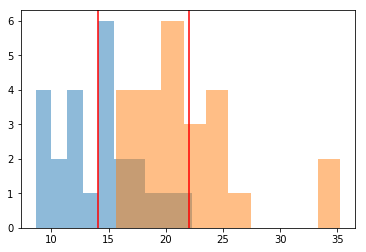

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
# Build the visualizations here

plt.hist(df_stroop['Congruent'], alpha=0.5), plt.hist(df_stroop['Incongruent'], alpha=0.5);
plt.axvline(x=df_stroop['Congruent'].mean(), color='red');
plt.axvline(x=df_stroop['Incongruent'].mean(), color='red');

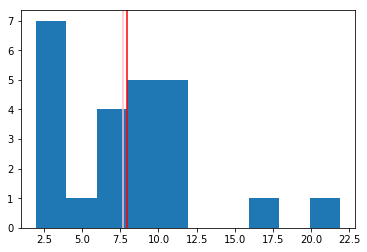

In [25]:
plt.hist(df_stroop['diff']);
plt.axvline(x=df_stroop['diff'].mean(), color='red');
plt.axvline(x=df_stroop['diff'].median(), color='pink');

the first plot above shows the distribution of the both the congruent and incongruent observations.  we can plainly see that the distribution for either condition is not nearly-normal around the mean - indicated by a red axis.  the Central Limit Theorem states that when the sample size is small $n < 30$ then the normal approximation is not apparent. 

the second plot shows the distribution of the differences in the observations around the mean difference. I have also included the median to show that the data are not strongly skewed.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [10]:
import scipy.stats as stats

# first I will calculate the t-statistic manually
t_stat = diff_mean / SE

# then I will run the t-test for related sample groups in scipy
t_test = stats.ttest_rel(df_stroop['Incongruent'], df_stroop['Congruent'])

In [12]:
print("the manually calculated t-statistic is: ", t_stat)
print("the results of the dependent t-test in scipy are as follows: ", t_test)

the manually calculated t-statistic is:  8.020706944109957
the results of the dependent t-test are as follows:  Ttest_relResult(statistic=8.020706944109957, pvalue=4.103000585711178e-08)


the chosen confidence threshold for this hypothesis test is $0.05$ where the chance of a Type 1 error - where $H_0$ is wrongly rejected is less than 5 percent. this is a fairly standard confidence level across hypothesis testing in inferential statistics.

the t-statistic calculated for this test is $8.0207$ and the p-value is a miniscule $0.000000041$. since this is far below the confidence threshold of $0.05$ we roundly reject the null hypothesis.

simply put, the chance of observing a sample mean difference in response times of at least as siginficant as $x_Rt(incon - con)$ under the null $H_0$ is incredibly small.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--